# Mercedes Benz Greener Manufacturing

### Goal of this project: Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. 

Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

Our end-goal is to reduce the time that cars spend on the test bench using model prediction.

__author__ = "Ovo Okpubuluku"
__email__ = "ovo@live.ca"

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Create Data Class for Importing and reading Datasets

In [2]:
#For Mercedes Benz dataset
class Data:
    def __init__(self, train_data, test_data):
        
        '''loading dataframes'''
        
        self.train_data = train_data
        self.test_data = test_data
        self.process_data()
        
    def process_data(self):
        self._create_train_df()
        self._create_test_df()
        self._column_info()
        self._print_trainstats()
        self._print_teststats()
        self._check_duplicates()
                  
       
    def _create_train_df(self):
        '''loads and prepares train dataframe'''
        self.train_df = self._load_dataset(train_data)
        self.y_train = self.train_df['y'].values
        
    def _create_test_df(self):
        '''loads and encodes labels in test dataframe'''
        self.test_df = self._load_dataset(test_data)
        
    def _column_info(self):
        self.cat_cols = self._cat_cols(self.train_df)
        self.num_cols = self._num_cols(self.train_df)
        
    def _print_trainstats(self):
        print('  \n ----------Train Data Info---------')
        self.printstats(self.train_df)
        self._check_nan(self.train_df)
        
    def _print_teststats(self):
        print('  \n ----------Test Data Info---------')
        self.printstats(self.test_df)
        self._check_nan(self.test_df)
    
    def _load_dataset(self, file):
        return pd.read_csv(file)
    
    def printstats(self, df):
        print('---------------------------------------------------------')
        print('Shape of Dataframe - {}'.format(df.shape))
        print('---------------------------------------------------------')
        print('\n Dataframe Info: \n')
        print('n{}'.format(df.info()))
        print('---------------------------------------------------------')
        print(' Categorical Features Stats: \n \n{}'.format(df.describe(include='O')))
              
    def _check_nan(self, df):
        '''Checks and verifies presence of null values in Dataframe'''
        nan = np.sum(df.isna().sum())
        if nan == 0:
            print('\n\n : There are no null values in the dataframes')
        else:
            print('The following columns have null values\n\n{}'.format(df.isnull().sum()))
              
    def _cat_cols(self, df):
        '''finds and lists Categorical Columns in Dataframe'''
        self.cat_cols = df.select_dtypes(include=['O']).columns.tolist()
        print('Categorical Columns list: {}'.format(self.cat_cols))
        print('---------------------------------------------------------------------')
        return self.cat_cols
              
    def _num_cols(self, df):
        '''finds and lists Numerical Columns in Dataframe'''
        self.num_cols = df.select_dtypes(exclude=['O']).columns.tolist()
        print('Numerical Columns list: {}'.format(self.num_cols))
        print('---------------------------------------------------------------------')
        return self.num_cols
              
              
    def _check_duplicates(self):
        '''Checks presence of duplicate entries'''
        print('\n : There are {} duplicate values in Train Data'.format(self.train_df.duplicated().sum()))
        print('\n : There are {} duplicate values in Test Data'.format(self.test_df.duplicated().sum()))

In [3]:
#Defining Dataset locations for upload
train_data = './train.csv'
test_data = './test.csv'

#Reading the Datasets
data = Data(train_data, test_data)

Categorical Columns list: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
---------------------------------------------------------------------
Numerical Columns list: ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X1

## Exploratory Data Analysis

In [4]:
data.train_df.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [5]:
data.test_df.head(10)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
5,8,y,aa,ai,e,d,x,g,s,0,...,1,0,0,0,0,0,0,0,0,0
6,10,x,b,ae,d,d,x,d,y,0,...,0,0,0,0,0,1,0,0,0,0
7,11,f,s,ae,c,d,h,d,a,0,...,0,0,1,0,0,0,0,0,0,0
8,12,ap,l,s,c,d,h,j,n,0,...,0,0,0,0,0,0,0,0,0,0
9,14,o,v,as,f,d,g,f,v,0,...,0,0,0,0,0,0,0,0,0,0


## Create Plots Class for Visualizations

Upon close examination of the data, the features from X0 to X8 listed as categorical actually contain object data type. The numeric features in the rest of the columns are binary integers

In [6]:
class Plots:
    '''For taking a closer look at the Target Column(y)'''
    sns.set(style="darkgrid")
    
    def __init__(self, data):
        self.data = data
        self.train_df = data.train_df
        self.test_df = data.test_df
        self.cat_cols = data.cat_cols
        self.num_cols = data.num_cols
        self.y_train = data.y_train
        self.eda_process()
        
    def eda_process(self):
        self._distplot()
        self._lineplot()
        self._scatterplot()
        self._barplots()
        
    def _distplot(self):
        '''Creates Distribution Plots for Target Value'''
        plt.figure(figsize=(15, 5))
        sns.distplot(self.y_train, bins=100, color = 'purple')
        plt.xlabel('Target value (seconds)')
        plt.ylabel('Frequency')
        plt.title('Distribution of the target value', fontsize=15)
        print('min: {} max: {} mean: {} std: {}'.format(min(self.y_train), max(self.y_train),\
                                                        self.y_train.mean(), self.y_train.std()))
        print('Count of values above 200: {}'.format(np.sum(self.y_train > 200)))
        plt.show()
            
    def _lineplot(self):
        '''Creates Lineplot for Target'''
        plt.figure(figsize=(15, 5))
        plt.plot(self.y_train, color = 'green')
        plt.xlabel('Row ID')
        plt.ylabel('Target')
        plt.title('Change in target value over the dataset', fontsize=15)
        plt.show()

        plt.figure(figsize=(15, 5))
        plt.plot(self.y_train[:75], color ='green')
        plt.xlabel('ID')
        plt.ylabel('Target value')
        plt.title('Change in target value over the first 75 samples', fontsize=15)
        plt.show()
        
    def _scatterplot(self):
        '''Creates Scatterplot for Target'''
        plt.figure(figsize=(15,8))
        plt.scatter(range(self.y_train.shape[0]), np.sort(self.y_train), color='r')
        plt.xlabel('index')
        plt.ylabel('Target Value')
        plt.title('Scatterplot of sorted Target Values', fontsize=15)
        plt.show()
        
    def _barplots(self):
        for col in data.cat_cols:
            value_counts = self.train_df[col].value_counts()
            fig, ax = plt.subplots(figsize=(12, 5))
            plt.title('Categorical Feature {} - Cardinality {}'.format(col, len(np.unique(self.train_df[col]))))
            plt.xlabel('Feature')
            plt.ylabel('Counts')
            plt.bar(range(len(value_counts)), value_counts.values)
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(value_counts.index, rotation='vertical')
            plt.tight_layout()
    

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168
Count of values above 200: 1


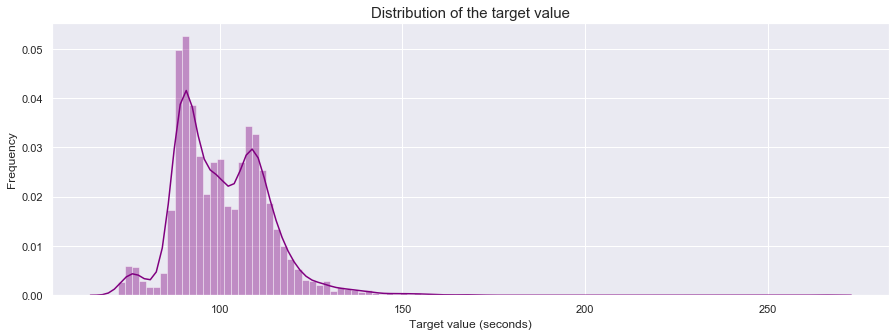

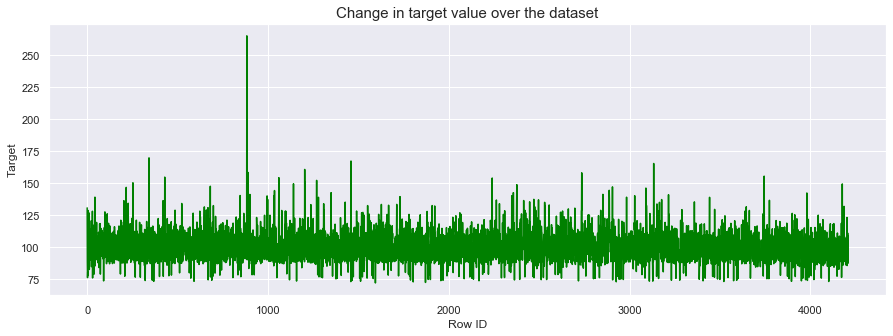

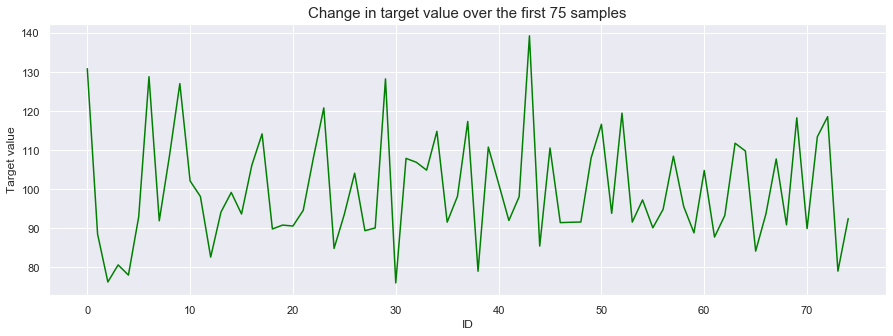

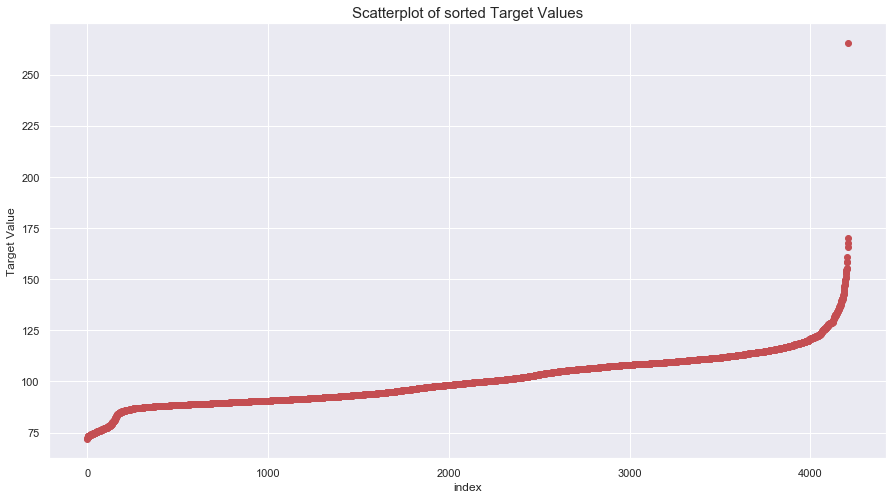

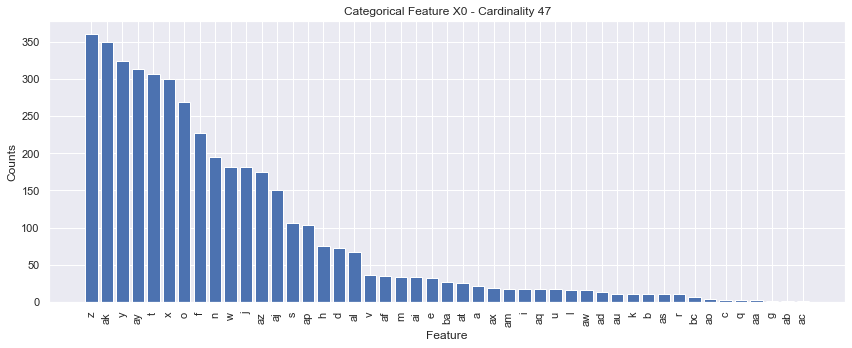

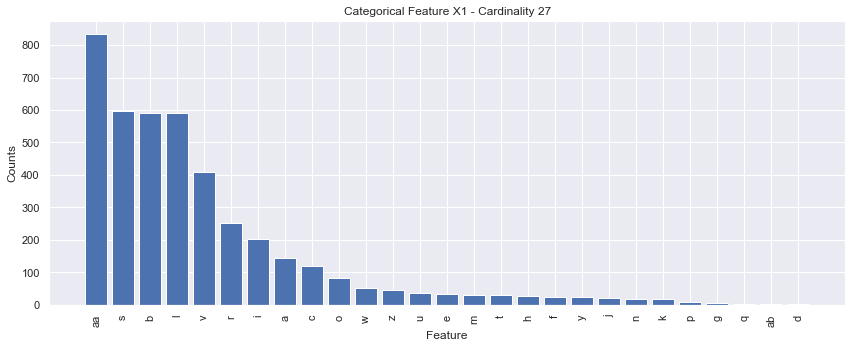

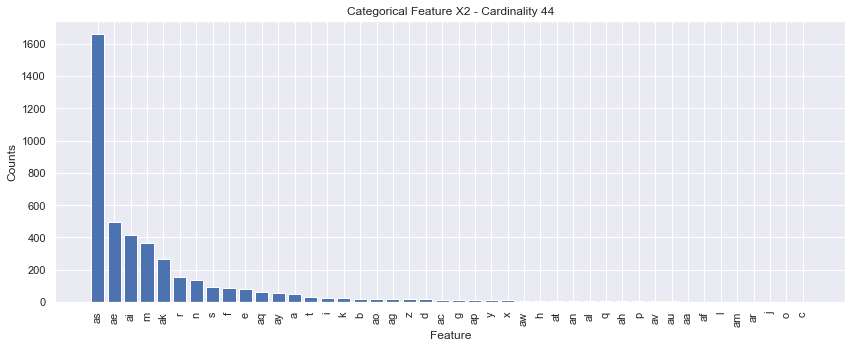

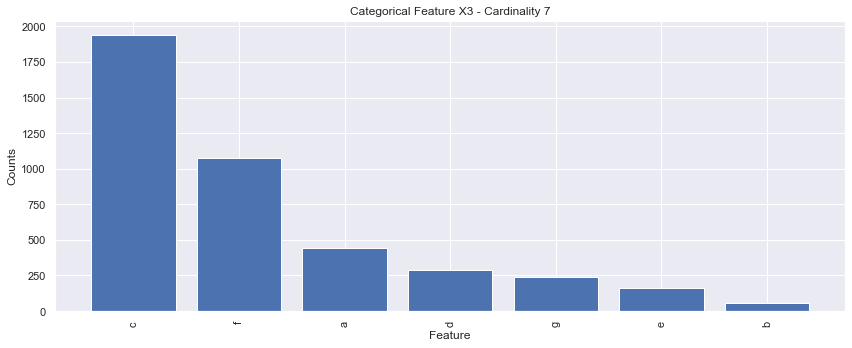

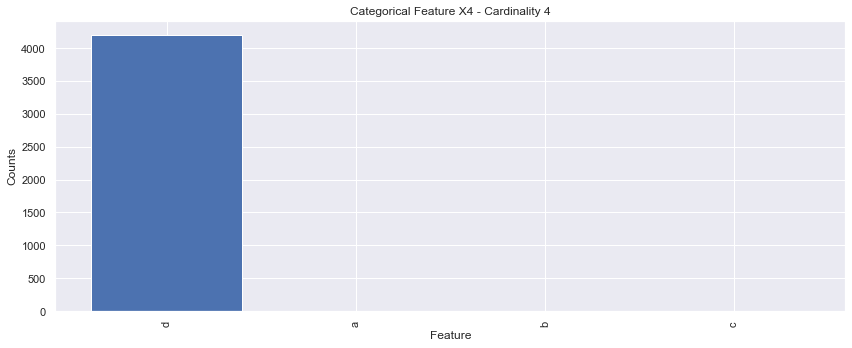

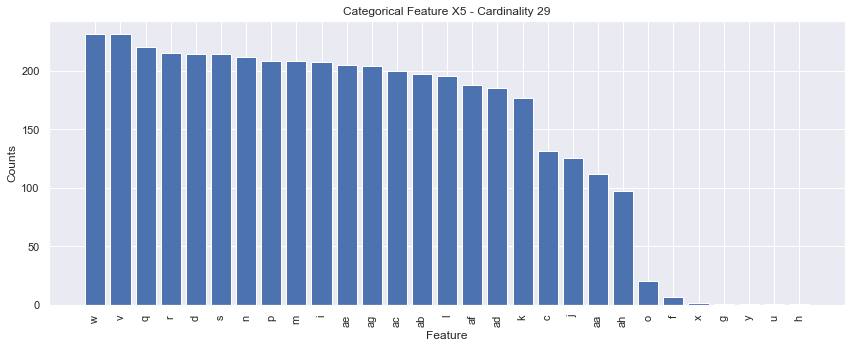

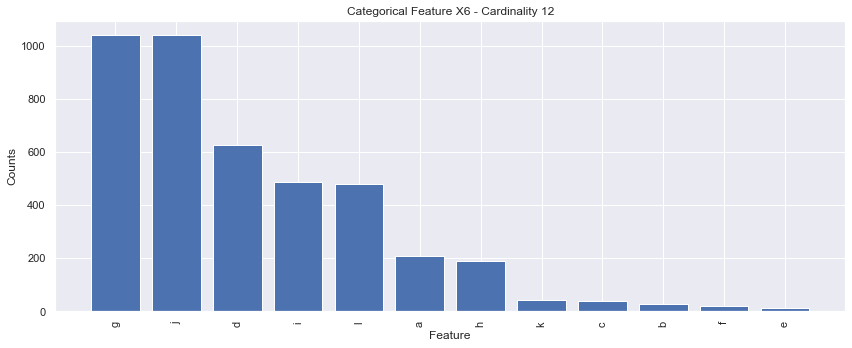

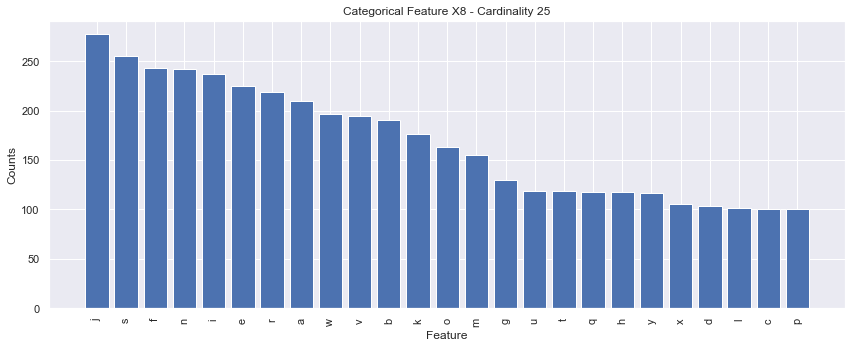

In [7]:
visuals = Plots(data)

In [8]:
zero_std = pd.DataFrame(data.train_df.std()==0)

In [9]:
zero_std.head()

,0
ID,False
y,False
X10,False
X11,True
X12,False


In [10]:
zero_std.columns = ['status']

In [11]:
(zero_std.loc[zero_std['status']== True])

,status
X11,True
X93,True
X107,True
X233,True
X235,True
X268,True
X289,True
X290,True
X293,True
X297,True


In [12]:
invalid_cols = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289','X290', 'X293', 'X297', 'X330', 'X347']
train_set = data.train_df.drop(columns = invalid_cols)
test_set = data.test_df.drop(columns = invalid_cols)

In [13]:
cat_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(train_set[col].values))
    train_set[col] = le.transform(list(train_set[col].values))
    le.fit(list(test_set[col].values))
    test_set[col] = le.transform(list(test_set[col].values))

x_train = train_set.drop(['y','ID'], axis=1)

y_train = train_set['y'].values

x_test = test_set.drop(['ID'], axis=1)

In [14]:
pca = PCA(n_components=0.95)

In [15]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print(x_train.shape)
x_train_transformed = pca.transform(x_train)
print(x_train_transformed.shape)

(4209, 364)
(4209, 6)


In [17]:
print(x_test.shape)
x_test_transformed = pca.transform(x_test)
print(x_test_transformed.shape)

(4209, 364)
(4209, 6)


In [18]:
pd.DataFrame(x_train_transformed)

,0,1,2,3,4,5
0,0.614765,-0.133009,15.624460,3.687564,1.359574,-2.691417
1,0.565407,1.560333,17.909581,-0.092902,1.536648,-4.442877
2,16.201713,12.292846,17.633540,0.186308,11.850820,-2.155389
3,16.149998,13.535419,14.898695,-3.140917,-6.832193,-4.290014
4,16.459103,13.175004,4.403096,7.671151,2.139916,3.763860
...,...,...,...,...,...,...
4204,22.161403,-7.184320,-8.659404,10.774860,4.669902,3.527910
4205,6.153949,22.828146,-8.314658,10.303221,-3.089276,0.073621
4206,29.004660,14.860905,-7.753332,11.224415,-5.846985,0.789306
4207,22.972422,1.684824,-9.031248,9.749805,9.449557,-4.355228


In [19]:
d_train = xgb.DMatrix(x_train_transformed, y_train)
d_test = xgb.DMatrix(x_test_transformed)

param = {'max_depth':4, 'eta':1, 'objective': 'reg:linear'}
num_round = 50

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)
    
bst = xgb.train(param, d_train, num_round, feval=xgb_r2_score, maximize=True)

pred = bst.predict(d_test)

[20:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
sub = pd.DataFrame()
sub['ID'] = test_set['ID'].values
sub['y'] = pred
sub.to_csv('model.csv', index=False)

In [21]:
sub.head(10)

,ID,y
0,1,94.931030
1,2,100.503471
2,3,99.669647
3,4,97.623283
4,5,83.266533
5,8,87.176170
6,10,93.290802
7,11,98.516052
8,12,121.719162
9,14,97.110069
